## 모델 성능 최대화를 위해 모델 자동화 추천 라이브러리 사용

In [ ]:
!pip install autogluon

In [86]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [87]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import LabelEncoder

In [88]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(37) # Seed 고정

In [89]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [90]:
train_df

,PRODUCT_ID,Y_Class,Y_Quality,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,...,X_3317,X_3318,X_3319,X_3320,X_3321,X_3322,X_3323,X_3324,X_3325,X_3326
0,TRAIN_0000,1,0.531957,T100304,T_31,2.0,95.0,0.0,45.0,10.0,...,0.000008,0.000003,0.191408,0.000008,0.001210,0.000021,0.000003,0.000002,0.189,0.000006
1,TRAIN_0001,1,0.531105,T100306,T_31,2.0,96.0,0.0,45.0,10.0,...,0.000008,0.000003,0.188993,0.000032,0.000644,0.000041,0.000002,0.000003,0.185,0.000029
2,TRAIN_0002,1,0.532292,T100306,T_31,2.0,95.0,0.0,45.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TRAIN_0003,1,0.528141,T100306,T_31,2.0,87.0,0.0,45.0,10.0,...,0.000007,0.000003,0.189424,0.000034,0.000678,0.000043,0.000004,0.000003,0.188,0.000031
4,TRAIN_0004,1,0.532289,T100306,T_31,2.0,95.0,0.0,45.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127,TRAIN_1127,0,0.516681,T050304,A_31,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1128,TRAIN_1128,1,0.530413,T100304,T_31,2.0,102.0,0.0,45.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1129,TRAIN_1129,1,0.533311,T100306,T_31,1.0,88.0,0.0,45.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1130,TRAIN_1130,0,0.513135,T010306,A_31,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
test_df

,PRODUCT_ID,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,...,X_3317,X_3318,X_3319,X_3320,X_3321,X_3322,X_3323,X_3324,X_3325,X_3326
0,TEST_000,T100304,T_31,2.0,94.0,0.0,45.0,11.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TEST_001,T100306,T_31,3.0,89.0,0.0,45.0,10.0,0.0,51.0,...,0.000007,0.000004,0.189134,0.000032,0.000664,0.000041,0.000004,0.000003,0.187,0.000030
2,TEST_002,T100304,T_31,2.0,100.0,0.0,45.0,10.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TEST_003,T100306,T_31,2.0,91.0,0.0,45.0,10.0,0.0,51.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TEST_004,T100306,T_31,2.0,87.0,0.0,45.0,10.0,0.0,51.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,TEST_530,T100306,T_31,1.0,95.0,0.0,45.0,10.0,0.0,51.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
531,TEST_531,T100306,T_31,2.0,91.0,0.0,45.0,10.0,0.0,53.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
532,TEST_532,T100304,T_31,2.0,93.0,0.0,45.0,10.0,0.0,45.0,...,0.000007,0.000005,0.190519,0.000009,0.001260,0.000024,0.000004,0.000002,0.190,0.000005
533,TEST_533,T100306,T_31,2.0,93.0,0.0,45.0,10.0,0.0,51.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
train = TabularDataset(train_df.drop(['PRODUCT_ID','Y_Quality'], axis=1))
test = TabularDataset(test_df.drop(['PRODUCT_ID'], axis=1))

In [93]:
train

,Y_Class,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,...,X_3317,X_3318,X_3319,X_3320,X_3321,X_3322,X_3323,X_3324,X_3325,X_3326
0,1,T100304,T_31,2.0,95.0,0.0,45.0,10.0,0.0,45.0,...,0.000008,0.000003,0.191408,0.000008,0.001210,0.000021,0.000003,0.000002,0.189,0.000006
1,1,T100306,T_31,2.0,96.0,0.0,45.0,10.0,0.0,53.0,...,0.000008,0.000003,0.188993,0.000032,0.000644,0.000041,0.000002,0.000003,0.185,0.000029
2,1,T100306,T_31,2.0,95.0,0.0,45.0,10.0,0.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,T100306,T_31,2.0,87.0,0.0,45.0,10.0,0.0,53.0,...,0.000007,0.000003,0.189424,0.000034,0.000678,0.000043,0.000004,0.000003,0.188,0.000031
4,1,T100306,T_31,2.0,95.0,0.0,45.0,10.0,0.0,51.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127,0,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1128,1,T100304,T_31,2.0,102.0,0.0,45.0,11.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1129,1,T100306,T_31,1.0,88.0,0.0,45.0,10.0,0.0,51.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1130,0,T010306,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
test

,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_3317,X_3318,X_3319,X_3320,X_3321,X_3322,X_3323,X_3324,X_3325,X_3326
0,T100304,T_31,2.0,94.0,0.0,45.0,11.0,0.0,45.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,T100306,T_31,3.0,89.0,0.0,45.0,10.0,0.0,51.0,10.0,...,0.000007,0.000004,0.189134,0.000032,0.000664,0.000041,0.000004,0.000003,0.187,0.000030
2,T100304,T_31,2.0,100.0,0.0,45.0,10.0,0.0,45.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,T100306,T_31,2.0,91.0,0.0,45.0,10.0,0.0,51.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,T100306,T_31,2.0,87.0,0.0,45.0,10.0,0.0,51.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,T100306,T_31,1.0,95.0,0.0,45.0,10.0,0.0,51.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
531,T100306,T_31,2.0,91.0,0.0,45.0,10.0,0.0,53.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
532,T100304,T_31,2.0,93.0,0.0,45.0,10.0,0.0,45.0,10.0,...,0.000007,0.000005,0.190519,0.000009,0.001260,0.000024,0.000004,0.000002,0.190,0.000005
533,T100306,T_31,2.0,93.0,0.0,45.0,10.0,0.0,51.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
# qualitative to quantitative
qual_col = ['LINE', 'PRODUCT_CODE']
for i in qual_col:
    le = LabelEncoder()
    le = le.fit(train[i])
    train[i] = le.transform(train[i])
    for label in np.unique(test[i]):
        if label not in le.classes_:
            le.classes_ = np.append(le.classes_, label)
    test[i] = le.transform(test[i])
print('Done.')

Done.


In [96]:
train

,Y_Class,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,...,X_3317,X_3318,X_3319,X_3320,X_3321,X_3322,X_3323,X_3324,X_3325,X_3326
0,1,4,2,2.0,95.0,0.0,45.0,10.0,0.0,45.0,...,0.000008,0.000003,0.191408,0.000008,0.001210,0.000021,0.000003,0.000002,0.189,0.000006
1,1,5,2,2.0,96.0,0.0,45.0,10.0,0.0,53.0,...,0.000008,0.000003,0.188993,0.000032,0.000644,0.000041,0.000002,0.000003,0.185,0.000029
2,1,5,2,2.0,95.0,0.0,45.0,10.0,0.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,5,2,2.0,87.0,0.0,45.0,10.0,0.0,53.0,...,0.000007,0.000003,0.189424,0.000034,0.000678,0.000043,0.000004,0.000003,0.188,0.000031
4,1,5,2,2.0,95.0,0.0,45.0,10.0,0.0,51.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127,0,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1128,1,4,2,2.0,102.0,0.0,45.0,11.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1129,1,5,2,1.0,88.0,0.0,45.0,10.0,0.0,51.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1130,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
test

,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_3317,X_3318,X_3319,X_3320,X_3321,X_3322,X_3323,X_3324,X_3325,X_3326
0,4,2,2.0,94.0,0.0,45.0,11.0,0.0,45.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,2,3.0,89.0,0.0,45.0,10.0,0.0,51.0,10.0,...,0.000007,0.000004,0.189134,0.000032,0.000664,0.000041,0.000004,0.000003,0.187,0.000030
2,4,2,2.0,100.0,0.0,45.0,10.0,0.0,45.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,2,2.0,91.0,0.0,45.0,10.0,0.0,51.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2,2.0,87.0,0.0,45.0,10.0,0.0,51.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,5,2,1.0,95.0,0.0,45.0,10.0,0.0,51.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
531,5,2,2.0,91.0,0.0,45.0,10.0,0.0,53.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
532,4,2,2.0,93.0,0.0,45.0,10.0,0.0,45.0,10.0,...,0.000007,0.000005,0.190519,0.000009,0.001260,0.000024,0.000004,0.000002,0.190,0.000005
533,5,2,2.0,93.0,0.0,45.0,10.0,0.0,51.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
label = 'Y_Class'
eval_metric = 'f1_macro'
time_limit = 3600

In [100]:
train = train.fillna(0)
test = test.fillna(0)

In [101]:
predictor = TabularPredictor(label=label, eval_metric=eval_metric).fit(train, tuning_data=None, 
time_limit = time_limit, presets='best_quality', hyperparameters=None, feature_metadata='infer', 
infer_limit=None, infer_limit_batch_size=None, fit_weighted_ensemble=True, num_cpus='auto', num_gpus='auto',
auto_stack = True, num_bag_folds=9, num_bag_sets=20, num_stack_levels=2, holdout_frac= None, use_bag_holdout= False,
hyperparameter_tune_kwargs =None, feature_prune_kwargs =None, ag_args = None, ag_args_fit = None, ag_args_ensemble =None,
excluded_model_types =None, refit_full = False, set_best_to_refit_full =False, keep_only_best =False, save_space =False)

No path specified. Models will be saved in: "AutogluonModels/ag-20230325_145536/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=2, num_bag_folds=9, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 3600s
AutoGluon will save models to "AutogluonModels/ag-20230325_145536/"
AutoGluon Version:  0.7.0
Python Version:     3.8.9
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Jan 25 16:41:43 UTC 2023
Train Data Rows:    1132
Train Data Columns: 3328
Label Column: Y_Class
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	3 unique label values:  [1, 2, 0]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 3
Using Feature

In [103]:
predictor.leaderboard(silent = True)


,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT_BAG_L2,0.717549,6.007482,1636.343301,0.233533,83.096346,2,True,15
1,WeightedEnsemble_L3,0.717549,6.009938,1638.447098,0.002456,2.103797,3,True,24
2,XGBoost_BAG_L2,0.716232,5.939573,1712.778161,0.165625,159.531206,2,True,22
3,WeightedEnsemble_L4,0.712952,11.478786,3016.263510,0.002391,1.900832,4,True,34
4,LightGBM_BAG_L3,0.712084,11.322997,2960.508485,0.236847,127.277867,3,True,27
5,LightGBM_BAG_L2,0.710095,6.005309,1684.397214,0.231361,131.150259,2,True,16
6,XGBoost_BAG_L3,0.709852,11.239548,2887.084811,0.153398,53.854193,3,True,33
7,LightGBM_BAG_L1,0.706542,0.280630,150.543474,0.280630,150.543474,1,True,5
8,WeightedEnsemble_L2,0.706542,0.282849,152.984447,0.002220,2.440973,2,True,13
9,LightGBMXT_BAG_L3,0.705637,11.326432,2912.278385,0.240282,79.047766,3,True,26


In [106]:
model_pred = predictor.predict(test, model=model_to_use)

In [107]:
submission = pd.read_csv('/data/sample_submission.csv')
submission['Y_Class'] = model_pred


(array([ 45.,   0.,   0.,   0.,   0., 401.,   0.,   0.,   0.,  89.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

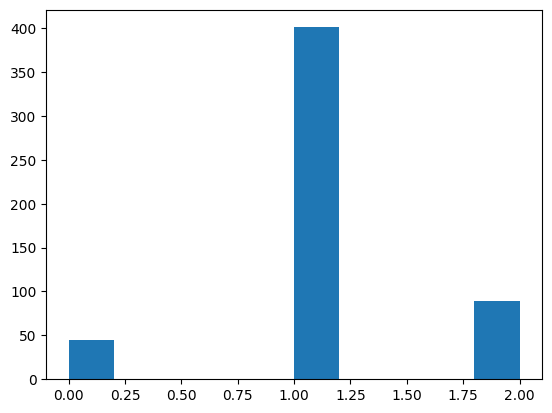

In [108]:
plt.hist(model_pred)

In [109]:
submission.to_csv('./baseline_submit.csv', index=False)